# Resturant Analysis

In this project i am going to analyse data on resturants in LA.

The project order wil be:

1. Preparing data to analysis
2. Analyzing the data and answering different questions
3. Submitting an online pdf presentation to share with investors 

for your convinence there are comments in every section explainning the code

Presentation link:

https://drive.google.com/file/d/1yXH4ecZie-eMP0wvi6xrMvppRqNpWdBM/view?usp=sharing

notebook link:



<div class="alert alert-info"> <b>Student's comment:</b> Dear reviewer, please notice i used the plotly liberary in some parts of the code, as it seems to not always work with the platform i made an online notebook that can be examined for your convienece. In case plotly won't work please use the online notebook and then write the review here.</div>

## Preparing data to analysis

In [192]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdpr
import re 
import numpy as np
import plotly.express as px
%matplotlib inline

In [193]:
#$ pip install plotly==4.11.0

In [194]:
#creating path
path = r'/datasets/rest_data_us.csv'

In [195]:
#loading data
rest = pd.read_csv(path)

In [196]:
#getting a profile report
pdpr.ProfileReport(rest)

#### Conclusion

1. It doesnt make much sense that in a big city like LA there will be only 12 starbucks or 13 mcdonalds. this should be further checked to make sure the data is correct.

2. addresses should be split to street names

3. On first apperaence we have more no chains than chains  

4. There are mostly resturant, after that there are fast foods and cafes

5. number of seats looks odd - but after a check there are resturants in LA that have only 1 seat (such as takeways, etc)

In [197]:
#getting general info
rest.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 2.4 MB


In [198]:
#changing types and making all letters lowercase

rest['object_name'] = rest['object_name'].str.lower()
rest['object_type'] = rest['object_type'].str.lower()

In [199]:
#Name preprocessing

#before values
rest['object_name'].value_counts()

the coffee bean & tea leaf     47
subway                         31
domino's pizza                 15
waba grill                     14
kentucky fried chicken         14
                               ..
lucy's el adobe restaurant      1
mcdonald's #2084                1
meizhou dongpo kitchen          1
kay kay chinese food            1
le pain quotidien larchmont     1
Name: object_name, Length: 8672, dtype: int64

In [200]:
rest['object_name'] = rest.apply(lambda x: ' '.join(re.findall('[a-z,\']+', x.object_name)), axis=1)

#making sure everything is changed correctly (there used me be mcdonalds looked like: mcdonald's #2084)
rest.loc[rest['object_name'].str.contains('mcdonald')]

#after values
rest['object_name'].value_counts()

subway                      122
starbucks coffee             87
mcdonald's                   80
jack in the box              54
the coffee bean tea leaf     51
                           ... 
go chew grill                 1
feng mao                      1
vicky's restaurant            1
barbara's at the brewery      1
                              1
Name: object_name, Length: 7812, dtype: int64

some resturants have more than 1 type, after a checkup its ok since sometimes big brances of mcdonalds for example are considered as a resturant

In [201]:
#cleaning address names
rest['street'] = rest.apply(lambda x: ' '.join(re.findall(r'[A-z]+\s?[A-z0-9]+\s?[A-z0-9]+\s?[A-z]+', x.address)), axis=1)

rest.head(10)

,id,object_name,address,chain,object_type,number,street
0,11786,habitat coffee shop,3708 N EAGLE ROCK BLVD,False,cafe,26,N EAGLE ROCK BLVD
1,11787,reilly's,100 WORLD WAY # 120,False,restaurant,9,WORLD WAY
2,11788,street churros,6801 HOLLYWOOD BLVD # 253,False,fast food,20,HOLLYWOOD BLVD
3,11789,triniti echo park,1814 W SUNSET BLVD,False,restaurant,22,W SUNSET BLVD
4,11790,pollen,2100 ECHO PARK AVE,False,restaurant,20,ECHO PARK AVE
5,11791,the spot grill,10004 NATIONAL BLVD,False,restaurant,14,NATIONAL BLVD
6,11792,cpk,100 WORLD WAY # 126,False,restaurant,100,WORLD WAY
7,11793,pho lala,3500 W 6TH ST STE 226,False,restaurant,7,W 6TH ST STE
8,11794,abc donuts,3027 N SAN FERNANDO RD UNIT 103,True,fast food,1,N SAN FERNANDO RD UNIT
9,11795,upstairs,3707 N CAHUENGA BLVD,False,restaurant,35,N CAHUENGA BLVD


In [202]:
#make sure all the big chains are marked as chains 

#adding a column with a count of the units
rest['number_of_stores'] = rest.groupby('object_name')['id'].transform('nunique')

#checking 
rest.sort_values('number_of_stores',ascending=False)

#cleaning should be done

,id,object_name,address,chain,object_type,number,street,number_of_stores
566,12352,subway,3991 S WESTERN AVE STE #3,True,fast food,40,S WESTERN AVE STE,122
3098,14884,subway,757 WESTWOOD PLZ,True,fast food,6,WESTWOOD PLZ,122
8475,20261,subway,4206 BEVERLY BLVD,True,fast food,27,BEVERLY BLVD,122
7243,19029,subway,3335 S FIGUEROA ST STE #N,True,fast food,45,S FIGUEROA ST STE,122
1538,13324,subway,2800 E 1ST ST,True,fast food,6,E 1ST ST,122
...,...,...,...,...,...,...,...,...
3550,15336,space e um,3020 WILSHIRE BLVD #100,False,restaurant,45,WILSHIRE BLVD,1
3549,15335,kentucky fried chicken t,380 WORLD WAY,True,fast food,44,WORLD WAY,1
3548,15334,the echo,1822 W SUNSET BLVD,False,restaurant,40,W SUNSET BLVD,1
3547,15333,virgin atlantic airways lounge,200 WORLD WAY ROOM 1066,False,restaurant,123,WORLD WAY ROOM,1


In [203]:
#according to google a chain is considered any resturant/cafe/etc with more than 10 units

#cheking that all units that have more than 10 are chains and the opposite

rest.loc[(rest['number_of_stores'] > 10) & (rest['chain'] == False)]

#changing the chain accordingly
def fix_chains(row):
    if row['number_of_stores'] > 10:
        row['chain'] = 'True'
    else:
        row['chain'] = 'False'
    return row    
rest = rest.apply(fix_chains, axis=1)

In [204]:
#making sure the change worked
print(rest.loc[(rest['number_of_stores'] > 10) & (rest['chain'] == False)])
print(rest.loc[(rest['number_of_stores'] < 10) & (rest['chain'] == True)])

Empty DataFrame
Columns: [id, object_name, address, chain, object_type, number, street, number_of_stores]
Index: []
Empty DataFrame
Columns: [id, object_name, address, chain, object_type, number, street, number_of_stores]
Index: []


## Data Analysis

In [205]:
#Investigate the proportions of the various types of establishments

rest_type_prop = rest.pivot_table(index='object_type',values='id', aggfunc='count').reset_index()

px.pie(rest_type_prop, values='id', names='object_type', title='Proportions of the various types of establishments')

### Conclusion

 - 75% = 3/4 of the establishments are restaurants.


 - After that only 11% are fast food.


 - The rest of the establishments have almost the same market share 3~4% each (cafe,pizza,bar,bakery) 


 - (If there was a bigger demand for other types of establishment there would have been more of them. since less than 15% of the establishments are cafe/pizza/bar/bakery there is probably not a lot of demand for them)

In [206]:
#Investigate the proportions of chain and nonchain establishments

rest_chain_or_not = rest.pivot_table(index='chain',values='id', aggfunc='count').reset_index()
print(rest_chain_or_not)

   chain    id
0  False  8765
1   True   886


In [207]:
px.pie(rest_chain_or_not, values='id', names=['Not Chain','Chain'], title='Proportions of chain and nonchain establishments')

### Conclusion

90.8% of the establishments are not chains.

as opposed to 9.18 which are chains

In [208]:
#Which type of establishment is typically a chain?

rest_chains = rest.loc[rest['chain']=='True']
rest_chains_pt = rest_chains.pivot_table(index='object_type', values='id', aggfunc='count').sort_values('id')
rest_chains_pt.columns = ['Number']

px.bar(rest_chains_pt,labels={'object_type':'Type'}, title='Chain establishments')

### Conclusion

Most of the chains estabishments are fast food and after them by not a big gap are restaurants.
the most unlikely to be a chain is a cafe of pizza place.

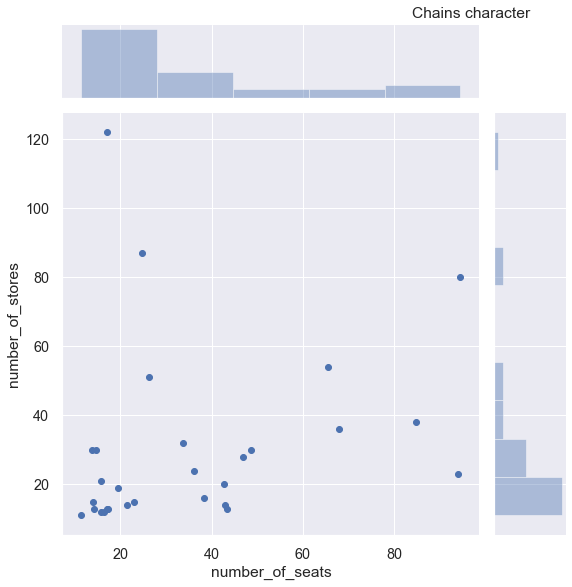

In [209]:
#What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

rest_chains_character = rest_chains.pivot_table(index='object_name', values=['number','number_of_stores'])
rest_chains_character.columns = ['number_of_seats','number_of_stores']

ax = sns.jointplot(x='number_of_seats',y='number_of_stores',data=rest_chains_character, height=8)
plt.title('Chains character',fontdict={'horizontalalignment':'right'}, pad=95)
plt.show()

### Conclusion

Most of the chains are characterized by around 20 branches with between 20 to 45 seats

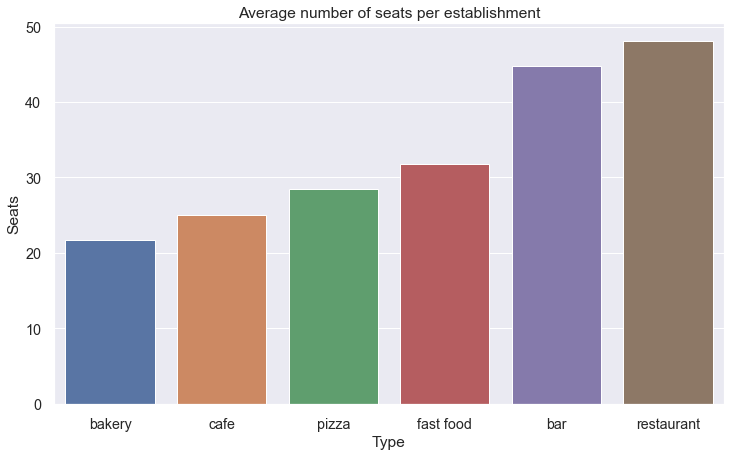

In [210]:
#Average number of seats for each type of establishment. On average, which type of establishment has the greatest number of seats?

rest_types = rest.pivot_table(index='object_type', values='number', aggfunc='mean').reset_index().sort_values('number')

plt.figure(figsize=(12,7))
sns.set(font_scale=1.3)
ax = sns.barplot(data=rest_types, x='object_type', y='number')
plt.title('Average number of seats per establishment')
ax.set_xlabel('Type')
ax.set_ylabel('Seats')
plt.show()

### Conclusion

On average restaurants have the most number of seats

The average number of seats for:

1. a restaurants: ~48
2. a bar: ~45
3. a fast food: ~32
4. a pizza: ~28
5. a cafe: ~25 
6. a bakery: ~ 21


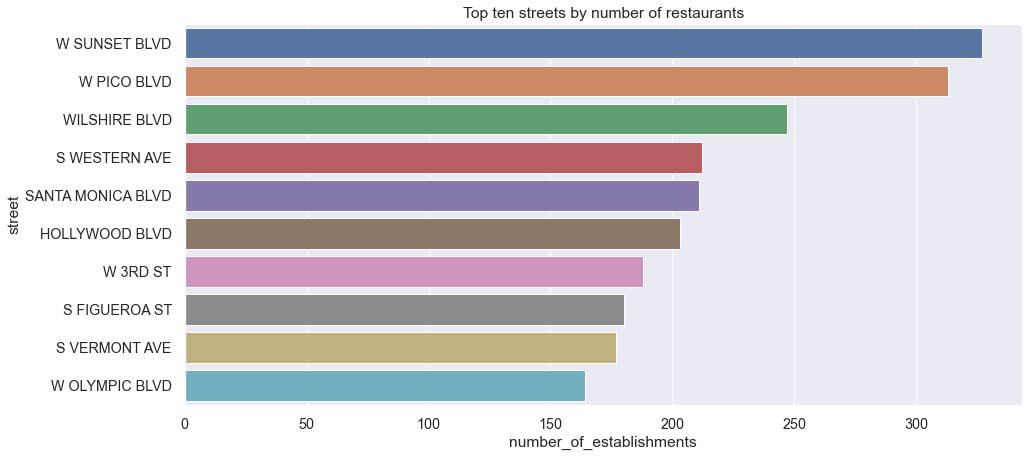

In [211]:
#Plot a graph of the top ten streets by number of restaurants

rest_top_streets = rest.pivot_table(index='street',values='id', aggfunc='count').sort_values('id', ascending=False).reset_index()
rest_top_streets.columns = ['street', 'number_of_establishments']
top_ten = rest_top_streets.iloc[0:10]

plt.figure(figsize=(15,7))
ax = sns.barplot(y='street', x='number_of_establishments', data=top_ten)
plt.title('Top ten streets by number of restaurants')
plt.show()

### Conclusion

Top 10 streets by number of restaurants:

1. W SUNSET BLVD ~325
2. W PICO BLVD ~315
3. WILSHIRE BLVD ~248
4. S WESTERN AVE ~210
5. SANTA MONICA BLVD ~210
6. HOLLYWOOD BLVD ~205
7. W 3RD ST ~180
8. S FIGUEROA ST ~175
9. S VERMONT AVE ~170
10. W OLYMPIC BLVD ~160

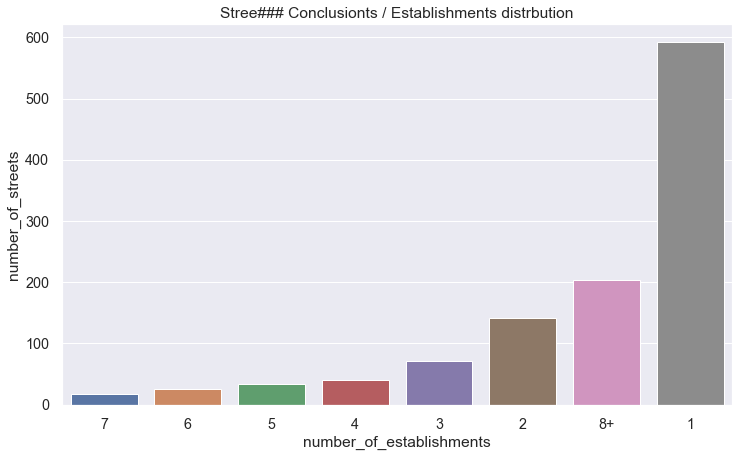

In [212]:
#Find the number of streets that only have one restaurant

one_rest = rest_top_streets.pivot_table(index='number_of_establishments', values='street', aggfunc='count').reset_index()
one_rest.columns = ['number_of_establishments', 'number_of_streets']
one_rest.loc[one_rest['number_of_establishments']>7, 'number_of_establishments'] = '8+'

plt.figure(figsize=(12,7))
one_rest = one_rest.pivot_table(index='number_of_establishments', values='number_of_streets', aggfunc='sum').reset_index().sort_values('number_of_streets')
sns.barplot(data=one_rest, x='number_of_establishments', y='number_of_streets')
plt.title('Stree### Conclusionts / Establishments distrbution')
plt.show()

### Conclusion

Almost 600 streets have only 1 restaurant

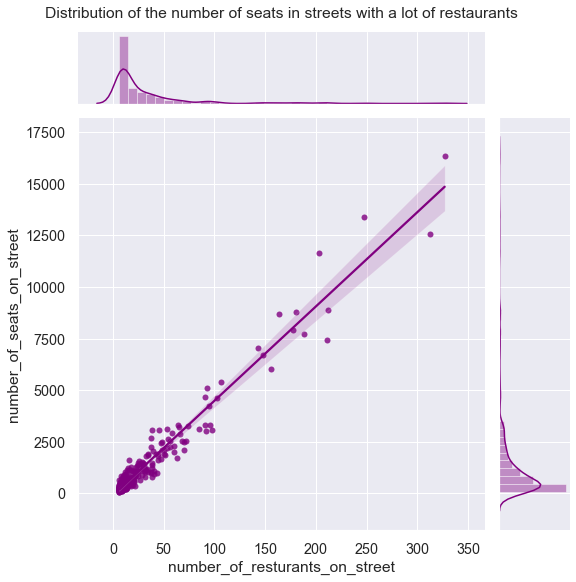

In [216]:
#Distribution of the number of seats in streets with a lot of restaurants

many_rest = rest.pivot_table(index='street', values=['id', 'number'], aggfunc={'id':'nunique','number':'sum'}).sort_values('id', ascending=False)
many_rest.columns = ['number_of_resturants_on_street','number_of_seats_on_street']

many_rest = many_rest.loc[many_rest['number_of_resturants_on_street']>5]

ax = sns.jointplot(x='number_of_resturants_on_street',y='number_of_seats_on_street',data=many_rest, kind='reg', height=8, color='purple')
plt.title('Distribution of the number of seats in streets with a lot of restaurants',fontdict={'horizontalalignment':'center'}, pad=100)
plt.show()

### Conclusion

There is a positive corralation between the number of restuarants on the street and the number of seats.
In streets that have a lot of restaurants these will also be bigger with alot of seats in them, probably due to a central location

# General Conclusion

### Preprocessing 

1. It doesnt make much sense that in a big city like LA there will be only 12 starbucks or 13 mcdonalds. this should be further checked to make sure the data is correct.

2. addresses should be split to street names

3. On first apperaence we have more no chains than chains  

4. There are mostly resturant, after that there are fast foods and cafes

5. number of seats looks odd - but after a check there are resturants in LA that have only 1 seat (such as takeways, etc)

### Analysis

 - 75% = 3/4 of the establishments are restaurants. After that only 11% are fast food. The rest of the establishments have almost the same market share 3~4% each (cafe,pizza,bar,bakery) 


 - (If there was a bigger demand for other types of establishment there would have been more of them. since less than 15% of the establishments are cafe/pizza/bar/bakery there is probably not a lot of demand for them)
 
 
 - 90.8% of the establishments are not chains. As opposed to 9.18 which are chains
 
 
 - Most of the chains estabishments are fast food and after them by not a big gap are restaurants. the most unlikely to be a chain is a cafe of pizza place
 
 
 - Most of the chains are characterized by around 20 branches with between 20 to 45 seats
 
 
 - On average restaurants have the most number of seats. The average number of seats for:

1. a restaurants: ~48
2. a bar: ~45
3. a fast food: ~32
4. a pizza: ~28
5. a cafe: ~25 
6. a bakery: ~ 21


 - Top 10 streets by number of restaurants:

1. W SUNSET BLVD ~325
2. W PICO BLVD ~315
3. WILSHIRE BLVD ~248
4. S WESTERN AVE ~210
5. SANTA MONICA BLVD ~210
6. HOLLYWOOD BLVD ~205
7. W 3RD ST ~180
8. S FIGUEROA ST ~175
9. S VERMONT AVE ~170
10. W OLYMPIC BLVD ~160


- Almost 600 streets have only 1 restaurant
 
 
 - There is a positive corralation between the number of restuarants on the street and the number of seats. In streets that have a lot of restaurants these will also be bigger with alot of seats in them, probably due to a central location.
 
 
- Recommendations on establishment type and number of seats: We should open a restaurant in one of the top 10 streets with between 20 to 45 seats (chains usually have this number, and considering the fact that they have to make everything cost effective, we can assume that their research has showed that this is the optimal size)

# Checklist 

- [X] clean data
- [X] Investigate the proportions of the various types of establishments. Plot a graph.
- [X] Investigate the proportions of chain and nonchain establishments. Plot a graph.
- [X] Which type of establishment is typically a chain?
- [x] What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?
- [x] Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.
- [x] Put the data on street names from the address column in a separate column.
- [x] Plot a graph of the top ten streets by number of restaurants.
- [x] Find the number of streets that only have one restaurant.
- [x] For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?
- [x] Write conclusions 
- [x] Preparing a presentation
- [x] Draw an overall conclusion and provide recommendations on establishment type and number of seats